# HW 5 - Python
## By Nathan Smith


In [1]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import os 

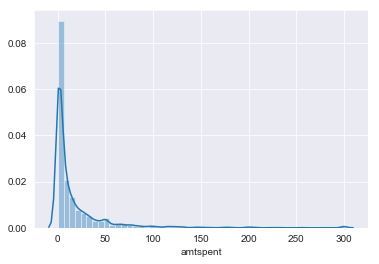

In [8]:

csvfile = 'Travel Pony Facebook.csv'

tpf = pd.read_csv('https://www.dropbox.com/s/jgtk2x9l1kh8oz4/Travel%20Pony%20Facebook.csv?dl=1')


#Select amount spend when not 0
tpf = tpf[ tpf['Amount Spent (USD)'] != 0 ]
#sets amtspent equal to the amount spent column
tpf['amtspent'] = tpf['Amount Spent (USD)']

sns.set_style('darkgrid')
sns.distplot(tpf['amtspent'])

#sets the campaign type to a categorical variable
tpf['Campaign Name'] = tpf['Campaign Name'].astype('category')
tpf['Campaign_Code'] = tpf['Campaign Name'].cat.codes


In [9]:
#Sets the x and y variables for later comparison
x = tpf[['Campaign_Code', 'Reach', 'Frequency', 'Impressions', 'Clicks', 'Unique Clicks'
         , 'Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes'
         , 'Post Comments', 'Post Shares', 'Photo Views', 'Website Clicks']]
y = tpf['amtspent']

In [6]:
#conducts an OLS regression of the two variables x and y
x = sm.add_constant(x)
x.shape
linreg=sm.OLS(y,x).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:               amtspent   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1743.
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:40:10   Log-Likelihood:                -6591.5
No. Observations:                1802   AIC:                         1.321e+04
Df Residuals:                    1788   BIC:                         1.329e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2165      1.531     

In [7]:
print('#####################################Question 3################################################')
print('')
print('')
print('What are the three predictors with the highest predictive value (rank them, please)')
print('')
print( 'Rank 1 = Page Likes (coef = 23.0417, P-value =  0.015)')
print( 'Rank 2 = Post Engagement (coef = 16.8084, P-value =  0.033)' )
print( 'Rank 3 = Frequency (coef= 4.4988, P-value = 0.002)')
print('')
print('')
print( 'If we base the analysis purely on magnitude of coefficients the top three would be')
print('')
print('Rank 1 = Page Likes, Rank 2 = Page Engagement, Rank 3 = Post Engagement')
print('')
print('It seems strange that Page Engagement would have such a large negative coefficient that is')
print('also significant. It does not makes sense that spending more on Page Engagement would cause')
print('users to frequent the page less often than had you spent no money at all.')
print('')
print('')
print('')

#####################################Question 3################################################


What are the three predictors with the highest predictive value (rank them, please)

Rank 1 = Page Likes (coef = 23.0417, P-value =  0.015)
Rank 2 = Post Engagement (coef = 16.8084, P-value =  0.033)
Rank 3 = Frequency (coef= 4.4988, P-value = 0.002)


If we base the analysis purely on magnitude of coefficients the top three would be

Rank 1 = Page Likes, Rank 2 = Page Engagement, Rank 3 = Post Engagement

It seems strange that Page Engagement would have such a large negative coefficient that is
also significant. It does not makes sense that spending more on Page Engagement would cause
users to frequent the page less often than had you spent no money at all.



